# Load train dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import binarize
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

pd.options.display.max_columns = None

In [2]:
MAIN = pd.read_csv('PREPDATA.csv')

In [3]:
X = MAIN.copy()

DropCol = [
    'Serial Number',
    'Resigned',
    'EduAllowYearDiff',
    'EduAllowFinishedIn1y',
]
X.drop(DropCol, axis=1, inplace=True)

X

BSC Indicator  Is MPT  Is Re-Entry  Exp at Action  Age at Action  \
0                 0       1            0      43.502604      59.839696   
1                 0       0            0      37.668125      59.839696   
2                 0       1            0      36.592127      59.426272   
3                 0       1            0      37.421713      59.836958   
4                 0       0            0      40.586733      59.836958   
5                 0       1            0      33.752918      60.830818   
6                 0       1            0      34.837129      59.836958   
7                 0       1            0      33.503768      59.251046   
8                 0       1            0      33.084868      59.420796   
9                 0       1            0      33.084868      58.169572   
10                0       1            0      36.088352      59.836958   
11                0       1            0      34.169079      55.672601   
12                0       0            0      33.175219      59.839696   
13                0       0            0      37.755738      55.511065   
14                0       0            0      34.174555      59.502933   
15                0       1            0      31.921258      55.584988   
16                0       1            0      32.838457      54.837539   
17                0       1            0      39.921422      59.836958   
18                0       1            0      34.251217      59.836958   
19                0       0            0      38.588061      59.839696   
20                0       0            0      30.921922      58.506335   
21                0       1            0      33.169743      59.839696   
22                0       1            0      30.839785      60.839032   
23                0       0            0      31.997919      56.669199   
24                0       0            0      32.923332      55.669863   
25                0       1            0      32.504432      59.836958   
26                0       1            0      36.170489      59.839696   
27                0       1            0      32.589307      59.839696   
28                0       1            0      35.001403      59.839696   
29                0       1            0      34.839867      59.839696   
...             ...     ...          ...            ...            ...   
3684              1       1            0       0.084875      29.254536   
3685              1       1            0       0.084875      22.667132   
3686              1       1            0       0.084875      23.504932   
3687              1       1            0       0.084875      29.503686   
3688              1       1            0       0.084875      22.256446   
3689              1       1            0       0.084875      24.085368   
3690              1       1            0       0.084875      20.750597   
3691              1       1            0       0.084875      24.170243   
3692              1       1            0       0.084875      25.667878   
3693              1       1            0       0.084875      25.002567   
3694              1       1            0       0.084875      23.422794   
3695              1       1            0       0.084875      23.918356   
3696              1       1            0       0.084875      26.004641   
3697              1       1            0       0.084875      23.337919   
3698              1       1            0       0.084875      22.505596   
3699              1       1            0       0.084875      22.667132   
3700              1       1            0       0.002738      23.918356   
3701              1       1            0       0.002738      22.919020   
3702              1       1            0       0.084875      23.337919   
3703              1       1            0       0.002738      23.836218   
3704              1       1            0       0.084875      26.256528   
3705              1       1            0       0.002738      24.665804   
3706      

In [4]:
y = MAIN['Resigned']

y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3684    0
3685    0
3686    0
3687    0
3688    0
3689    0
3690    0
3691    0
3692    0
3693    0
3694    0
3695    0
3696    0
3697    0
3698    0
3699    0
3700    0
3701    0
3702    0
3703    0
3704    0
3705    0
3706    0
3707    0
3708    0
3709    0
3710    0
3711    0
3712    0
3713    0
Name: Resigned, Length: 3714, dtype: int64

# Load predict dataset

In [5]:
PRED = pd.read_csv('PREPDATA2018.csv')

In [6]:
X_pred = PRED.copy()

DropCol = [
    'Serial Number',
    'Resigned',
    'EduAllowYearDiff',
    'EduAllowFinishedIn1y',
]
X_pred.drop(DropCol, axis=1, inplace=True)

X_pred

BSC Indicator  Is MPT  Is Re-Entry  Exp at Action  Age at Action  \
0                 1       1            0      37.306721      58.812980   
1                 0       1            0      36.838539      59.839696   
2                 0       1            0      37.063047      59.064868   
3                 0       0            0      36.896035      57.476882   
4                 0       1            0      34.089680      59.839696   
5                 1       1            0      34.062301      56.307796   
6                 0       1            0      33.558526      55.064786   
7                 1       0            0      33.558526      55.727359   
8                 1       1            0      32.477053      55.727359   
9                 0       1            0      33.062965      52.477464   
10                0       0            0      32.895953      57.392007   
11                0       1            0      32.895953      55.308459   
12                0       1            0      32.252545      55.505589   
13                0       1            0      32.559190      54.979911   
14                1       1            0      32.477053      58.728105   
15                0       1            0      32.559190      57.643894   
16                0       0            0      32.230641      55.231798   
17                0       1            0      32.145766      54.144849   
18                1       1            0      32.145766      54.478874   
19                0       1            0      32.063629      53.307049   
20                1       1            0      31.811742      56.726695   
21                1       1            0      31.811742      54.645886   
22                1       1            0      31.726866      52.896363   
23                0       0            0      31.726866      53.977837   
24                0       1            0      31.559854      52.811488   
25                0       0            0      30.897281      53.558937   
26                0       1            1       2.228656      51.560265   
27                0       1            0      30.727530      55.393335   
28                0       0            0      30.393506      51.979165   
29                0       1            0      30.144356      53.725949   
...             ...     ...          ...            ...            ...   
2124              1       1            0       0.062972      23.064129   
2125              1       1            0       0.145109      22.560354   
2126              1       1            0       0.145109      27.978672   
2127              1       1            0       0.145109      25.391350   
2128              1       1            0       0.062972      26.560436   
2129              0       1            0       0.145109      24.726038   
2130              1       1            0       0.062972      22.560354   
2131              1       1            0       0.062972      22.478217   
2132              1       1            0       0.145109      25.810249   
2133              0       1            0       0.145109      26.144274   
2134              0       0            0       0.145109      27.477635   
2135              0       1            0       0.145109      23.644565   
2136              1       1            0       0.145109      26.308548   
2137              1       1            0       0.062972      26.812323   
2138              0       1            0       0.145109      24.392014   
2139              1       1            0       0.062972      22.979254   
2140              1       1            0       0.062972      25.895124   
2141              1       1            0       0.062972      22.897116   
2142              1       1            0       0.062972      27.064211   
2143              1       1            0       0.062972      22.560354   
2144              1       1            0       0.062972      23.978590   
2145              0       1            0       0.062972      22.979254   
2146      

In [7]:
y_pred = PRED['Resigned']

y_pred

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2124    0
2125    0
2126    0
2127    0
2128    0
2129    0
2130    0
2131    0
2132    0
2133    0
2134    0
2135    0
2136    0
2137    0
2138    0
2139    0
2140    0
2141    0
2142    0
2143    0
2144    0
2145    0
2146    0
2147    0
2148    0
2149    0
2150    0
2151    0
2152    0
2153    0
Name: Resigned, Length: 2154, dtype: int64

## Decision Tree

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
dtree_predictions = dtree.predict(X_pred)

print(classification_report(y_pred, dtree_predictions))
print(confusion_matrix(y_pred, dtree_predictions))

             precision    recall  f1-score   support

          0       0.99      0.76      0.86      2085
          1       0.09      0.67      0.15        69

avg / total       0.96      0.76      0.84      2154

[[1590  495]
 [  23   46]]


Text(0,0.5,'Frequency')

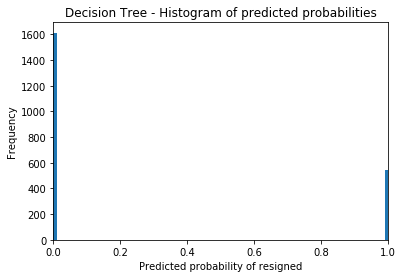

In [9]:
dtree_pred_prob = dtree.predict_proba(X_pred)[:, 1]
plt.hist(dtree_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Decision Tree - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

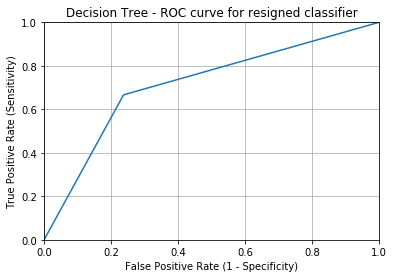

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, dtree_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Decision Tree - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [11]:
cross_val_score(dtree, X, y, cv=10, scoring='roc_auc').mean()

0.6416418938335362

In [12]:
names = X.columns

feature_imp = (sorted(zip(map(lambda x: round(x, 4), dtree.feature_importances_), names), reverse=True))

In [13]:
df = pd.DataFrame(feature_imp)
df

0                   1
0   0.2382       Exp at Action
1   0.1386   SUP Exp at Action
2   0.1177       BSC Indicator
3   0.1109   SUP Age at Action
4   0.0807        VAC_Vacation
5   0.0573       Age at Action
6   0.0454     Year After Grad
7   0.0298   Age Diff SUPvsEMP
8   0.0262              days1Y
9   0.0187        VAC_Personal
10  0.0165             count1Y
11  0.0165              Is MPT
12  0.0164            VAC_Sick
13  0.0149              days3M
14  0.0133             count3M
15  0.0111          MAX Degree
16  0.0085             Is STEM
17  0.0062          VAC_Others
18  0.0054        SUP Gender_M
19  0.0049   VAC_DependentCare
20  0.0047            Gender_M
21  0.0034          House Loan
22  0.0033         Is Re-Entry
23  0.0029              Is SUP
24  0.0029       EDU Allowance
25  0.0024          SUP Is MPT
26  0.0015            Gender_F
27  0.0011        SUP Gender_F
28  0.0008       VAC_Maternity
29  0.0000  SUP Older Than EMP

## Random Forest

In [14]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X, y)
rfc_pred = rfc.predict(X_pred)

print(classification_report(y_pred,rfc_pred))
print(confusion_matrix(y_pred,rfc_pred))

             precision    recall  f1-score   support

          0       0.99      0.87      0.92      2085
          1       0.15      0.70      0.24        69

avg / total       0.96      0.86      0.90      2154

[[1807  278]
 [  21   48]]


In [16]:
rfc_pred_prob = rfc.predict_proba(X_pred)[:, 1]
rfc_pred_prob

array([ 0.115 ,  0.01  ,  0.095 , ...,  0.5725,  0.41  ,  0.83  ])

In [17]:
Report = PRED.copy()

In [18]:
Report.loc[:, 'Propability'] = rfc_pred_prob
Report

Serial Number  BSC Indicator  Resigned  Is MPT  Is Re-Entry  \
0               357              1         0       1            0   
1               368              0         0       1            0   
2               371              0         0       1            0   
3               378              0         0       0            0   
4               414              0         0       1            0   
5               428              1         0       1            0   
6               445              0         0       1            0   
7               448              1         0       0            0   
8               449              1         0       1            0   
9               455              0         0       1            0   
10              458              0         0       0            0   
11              461              0         0       1            0   
12              468              0         0       1            0   
13              470              0         0       1            0   
14              471              1         0       1            0   
15              472              0         0       1            0   
16              477              0         0       0            0   
17              480              0         0       1            0   
18              482              1         0       1            0   
19              486              0         0       1            0   
20              491              1         0       1            0   
21              493              1         0       1            0   
22              495              1         0       1            0   
23              496              0         0       0            0   
24              498              0         0       1            0   
25              506              0         0       0            0   
26              507              0         0       1            1   
27              509              0         0       1            0   
28              513              0         0       0            0   
29              519              0         0       1            0   
...             ...            ...       ...     ...          ...   
2124           5075              1         0       1            0   
2125           5076              1         0       1            0   
2126           5077              1         0       1            0   
2127           5078              1         0       1            0   
2128           5079              1         0       1            0   
2129           5080              0         0       1            0   
2130           5081              1         0       1            0   
2131           5082              1         0       1            0   
2132           5083              1         0       1            0   
2133           5084              0         0       1            0   
2134           5085              0         0       0            0   
2135           5086              0         0       1            0   
2136           5087              1         0       1            0   
2137           5089              1         0       1            0   
2138           5091              0         0       1            0   
2139           5092              1         0       1            0   
2140           5093              1         0       1            0   
2141           5094              1         0       1            0   
2142           5095              1         0       1            0   
2143           5096              1         0       1            0   
2144           5097              1         0       1            0   
2145           5098              0         0       1            0   
2146           5099              1         0       1            0   
2147           5101              1         0       1            0   
2148           5102              0         0       1            0   
2149           5104              0         0       1            0   
2150

In [19]:
rfc_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [20]:
Report.loc[:, 'Predicted'] = rfc_pred
Report

Serial Number  BSC Indicator  Resigned  Is MPT  Is Re-Entry  \
0               357              1         0       1            0   
1               368              0         0       1            0   
2               371              0         0       1            0   
3               378              0         0       0            0   
4               414              0         0       1            0   
5               428              1         0       1            0   
6               445              0         0       1            0   
7               448              1         0       0            0   
8               449              1         0       1            0   
9               455              0         0       1            0   
10              458              0         0       0            0   
11              461              0         0       1            0   
12              468              0         0       1            0   
13              470              0         0       1            0   
14              471              1         0       1            0   
15              472              0         0       1            0   
16              477              0         0       0            0   
17              480              0         0       1            0   
18              482              1         0       1            0   
19              486              0         0       1            0   
20              491              1         0       1            0   
21              493              1         0       1            0   
22              495              1         0       1            0   
23              496              0         0       0            0   
24              498              0         0       1            0   
25              506              0         0       0            0   
26              507              0         0       1            1   
27              509              0         0       1            0   
28              513              0         0       0            0   
29              519              0         0       1            0   
...             ...            ...       ...     ...          ...   
2124           5075              1         0       1            0   
2125           5076              1         0       1            0   
2126           5077              1         0       1            0   
2127           5078              1         0       1            0   
2128           5079              1         0       1            0   
2129           5080              0         0       1            0   
2130           5081              1         0       1            0   
2131           5082              1         0       1            0   
2132           5083              1         0       1            0   
2133           5084              0         0       1            0   
2134           5085              0         0       0            0   
2135           5086              0         0       1            0   
2136           5087              1         0       1            0   
2137           5089              1         0       1            0   
2138           5091              0         0       1            0   
2139           5092              1         0       1            0   
2140           5093              1         0       1            0   
2141           5094              1         0       1            0   
2142           5095              1         0       1            0   
2143           5096              1         0       1            0   
2144           5097              1         0       1            0   
2145           5098              0         0       1            0   
2146           5099              1         0       1            0   
2147           5101              1         0       1            0   
2148           5102              0         0       1            0   
2149           5104              0         0       1            0   
2150

In [21]:
Report.to_csv('Report_22AUG2018.csv')

Text(0,0.5,'Frequency')

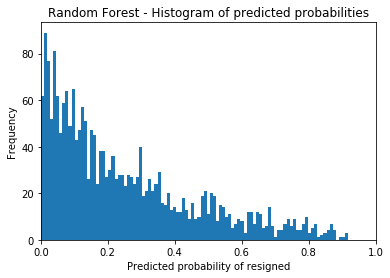

In [15]:
rfc_pred_prob = rfc.predict_proba(X_pred)[:, 1]
plt.hist(rfc_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Random Forest - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

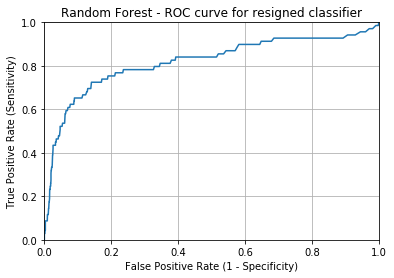

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, rfc_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [17]:
cross_val_score(rfc, X, y, cv=10, scoring='roc_auc').mean()

0.79575810584108331

## Mean decrease impurity

In [18]:
names = X.columns

feature_imp = (sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

In [19]:
df = pd.DataFrame(feature_imp)
df

0                   1
0   0.1281       Exp at Action
1   0.1071       Age at Action
2   0.0948     Year After Grad
3   0.0933   SUP Exp at Action
4   0.0774   SUP Age at Action
5   0.0669       BSC Indicator
6   0.0632        VAC_Vacation
7   0.0632   Age Diff SUPvsEMP
8   0.0520              days1Y
9   0.0425             count1Y
10  0.0332            VAC_Sick
11  0.0288              days3M
12  0.0245             count3M
13  0.0167        VAC_Personal
14  0.0164          VAC_Others
15  0.0148          MAX Degree
16  0.0098              Is MPT
17  0.0095             Is STEM
18  0.0082        SUP Gender_M
19  0.0082        SUP Gender_F
20  0.0072            Gender_F
21  0.0070            Gender_M
22  0.0063  SUP Older Than EMP
23  0.0055              Is SUP
24  0.0050       EDU Allowance
25  0.0029   VAC_DependentCare
26  0.0026       VAC_Maternity
27  0.0022         Is Re-Entry
28  0.0022          House Loan
29  0.0007          SUP Is MPT

## Logistic Regression

In [20]:
logreg = LogisticRegression()
logreg.fit(X, y)
logreg_pred = logreg.predict(X_pred)
acc_log = round(logreg.score(X, y) * 100, 2)

print(acc_log)
print(classification_report(y_pred,logreg_pred))
print(confusion_matrix(y_pred,logreg_pred))

78.14
             precision    recall  f1-score   support

          0       0.99      0.83      0.90      2085
          1       0.13      0.81      0.23        69

avg / total       0.97      0.83      0.88      2154

[[1726  359]
 [  13   56]]


Text(0,0.5,'Frequency')

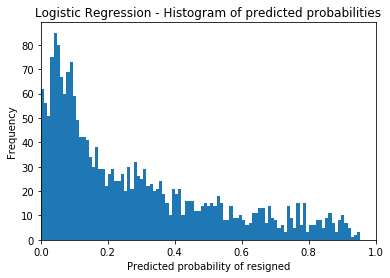

In [21]:
logreg_pred_prob = logreg.predict_proba(X_pred)[:, 1]
plt.hist(logreg_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Logistic Regression - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

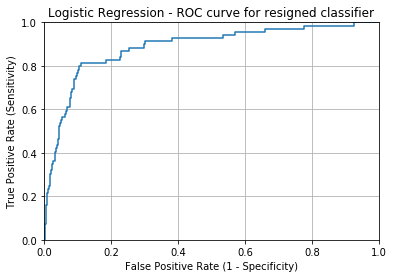

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, logreg_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [23]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82244028692502713

## SVC

In [24]:
svc = SVC()
svc.fit(X, y)
svc_pred = svc.predict(X_pred)
acc_svc = round(svc.score(X, y) * 100, 2)

print(acc_svc)
print(classification_report(y_pred,svc_pred))
print(confusion_matrix(y_pred,svc_pred))

94.37
             precision    recall  f1-score   support

          0       0.97      0.88      0.93      2085
          1       0.08      0.29      0.12        69

avg / total       0.95      0.86      0.90      2154

[[1841  244]
 [  49   20]]


In [25]:
cross_val_score(svc, X, y, cv=10, scoring='roc_auc').mean()

0.74086047569397251